In [2]:
import mdtraj as md
import numpy as np
from matplotlib import pyplot as plt

In [3]:
crystal = md.load("../Inputs/3RY2.pdb")
alphafold = md.load("../Data/3RY2/relaxed_model_1_pred_0.pdb")
colabfold = md.load("../Data/3RY2_colabfold/3RY2_76ce1_unrelaxed_rank_001_alphafold2_ptm_model_3_seed_000.pdb")

In [48]:
print(len(alphafold.topology.select("protein and backbone and name CA and chainid 0 and resid > 1 and resid < 124")))
print(len(colabfold.topology.select("protein and backbone and name CA and chainid 0 and resid > 1 and resid < 124")))

print(len(crystal.topology.select("protein and backbone and name CA and chainid 1")))

122
122
122


In [24]:
print(alphafold.topology.select("protein and sidechain and chainid 0 and resid > 1 and resid < 124"))
print(crystal.topology.select("protein and sidechain and chainid 0"))

[  32   33   34 ... 1786 1788 1789]
[  4   5   6   7   8  13  22  23  24  25  30  31  32  41  42  43  48  49
  50  51  52  53  54  55  56  57  62  63  64  65  66  67  68  69  74  75
  76  77  82  83  84  85  86  91  92  93  94 103 104 109 110 111 116 117
 118 119 120 121 122 127 128 129 130 135 136 137 142 143 144 149 158 163
 164 165 166 175 180 181 182 183 188 189 190 199 200 201 206 207 208 209
 210 211 212 213 218 219 220 221 222 227 228 233 238 239 240 249 250 251
 252 257 262 263 264 265 266 271 272 277 278 279 280 281 282 283 288 289
 290 291 292 293 294 295 300 301 302 307 308 309 310 315 316 317 326 327
 328 329 330 331 332 337 338 339 340 341 342 343 344 349 350 351 352 357
 358 363 368 369 370 375 380 381 382 387 388 389 390 399 400 409 410 411
 416 421 422 423 424 433 434 435 436 437 438 439 440 441 442 447 448 449
 454 455 456 461 466 467 468 469 470 471 472 473 474 475 480 481 482 483
 484 489 490 491 492 497 498 499 500 505 506 507 508 509 510 511 512 517
 518 519 520 52

In [36]:
def find_rmsd(selection):
    alphafold_indices = alphafold.topology.select(f"protein {selection} and chainid 0 and resid > 1 and resid < 124")
    colabfold_indices = colabfold.topology.select(f"protein {selection} and chainid 0 and resid > 1 and resid < 124")
    crystal_indices = crystal.topology.select(f"protein {selection} and chainid 1")

    alphafold_rmsd = md.rmsd(alphafold, crystal, atom_indices=alphafold_indices, ref_atom_indices=crystal_indices)
    colabfold_rmsd = md.rmsd(colabfold, crystal, atom_indices=colabfold_indices, ref_atom_indices=crystal_indices)
    
    return(alphafold_rmsd, colabfold_rmsd)

[0.07150486] [0.07479119]
[0.07089002] [0.07496157]


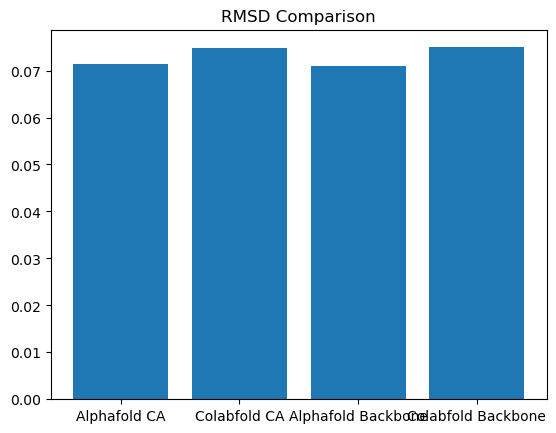

In [44]:
(CA_alphafold, CA_colabfold) = find_rmsd("and backbone and name CA")
(backbone_alphafold, backbone_colabfold) = find_rmsd("and backbone")
print(CA_alphafold, CA_colabfold)
print(backbone_alphafold, backbone_colabfold)
#(sidechain_alphafold, sidechain_colabfold) = find_rmsd("and not water and not name H")
#print(sidechain_alphafold, sidechain_colabfold)

plt.bar(["Alphafold CA", "Colabfold CA", "Alphafold Backbone", "Colabfold Backbone"], 
        [CA_alphafold[0], CA_colabfold[0], backbone_alphafold[0], backbone_colabfold[0]])
plt.title("RMSD Comparison")
plt.savefig("../Figures/RMSD.png")
plt.show()